# Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### First thing we should do is to see our dataset and answer some questions 

In [2]:
insurance_train_filepath = "./kaggle/train/train.csv"

# Read the file into a variable insurance_data_train
insurance_data_train = pd.read_csv(insurance_train_filepath, index_col="id")

In [3]:
insurance_test_filepath = "./kaggle/test/test.csv"

# Read the file into a variable insurance_data_train
insurance_data_test = pd.read_csv(insurance_test_filepath)

### The best start you need to do on your project is to see your dataset and the shape of it 

In [4]:
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
insurance_data_train.shape

(11504798, 11)

In [6]:
insurance_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


### It seems that there are some features which are categorical

### Checking the missing values in this dataset 

In [7]:
missing_values = insurance_data_train.isnull().sum()
missing_values

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Good! There are no missing values

# Exploratory Data Analysis(EDA)

In [8]:
insurance_data_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

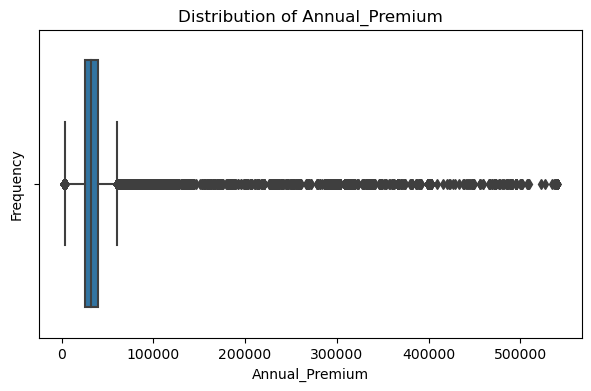

In [9]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=insurance_data_train['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

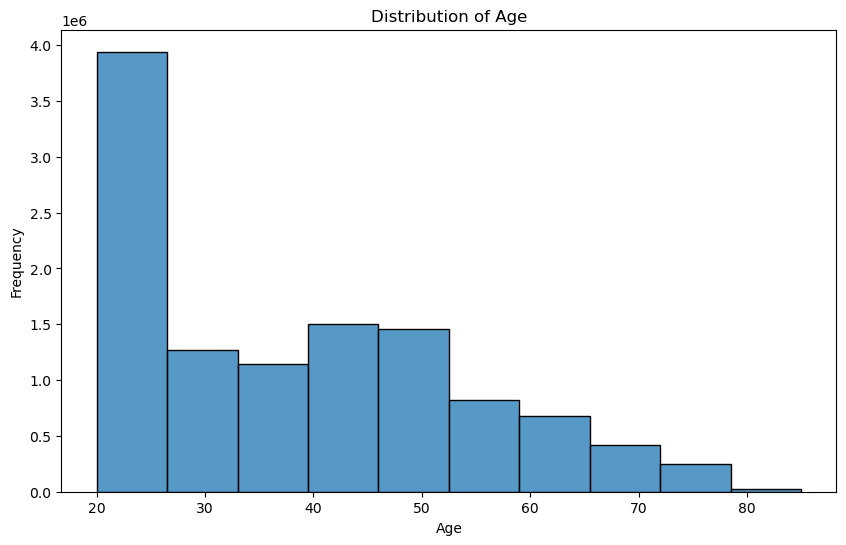

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

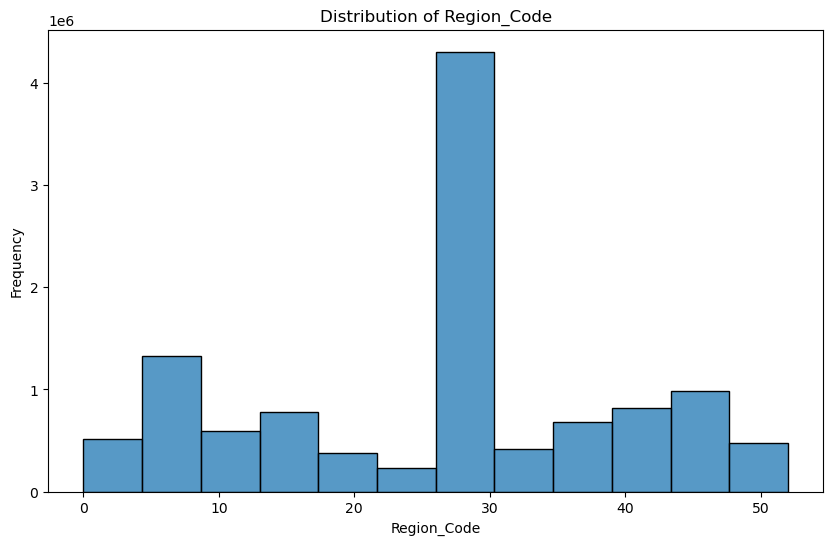

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

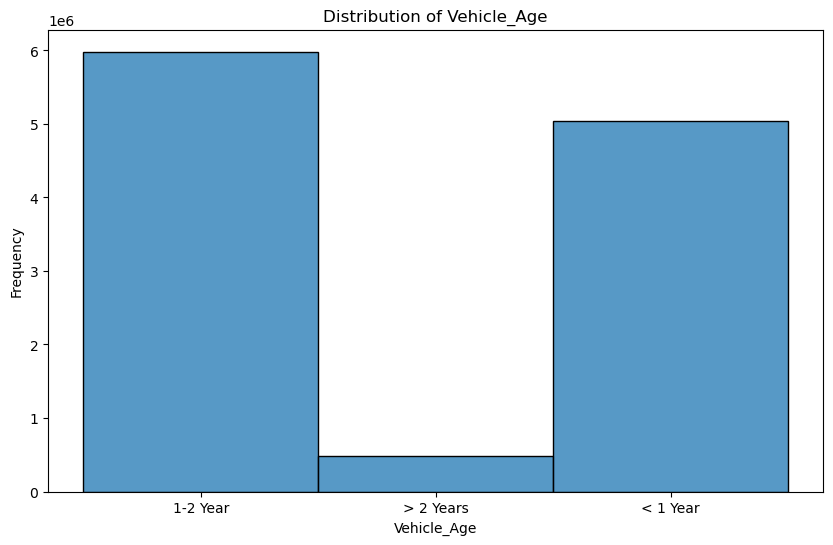

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

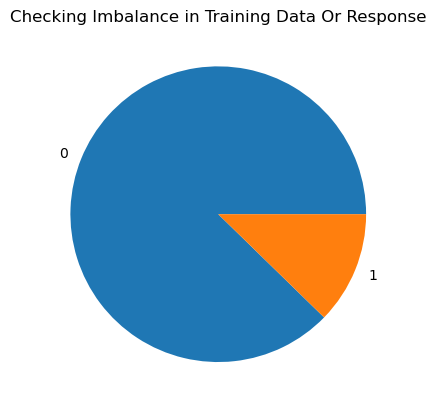

In [13]:
response_data = insurance_data_train['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')

### It seems that the data is imbalanced 

# Feature Engineering

### Handle Categorical Data

### For Training

In [9]:
insurance_data_train['Vehicle_Age'] = insurance_data_train['Vehicle_Age'].astype('category')
insurance_data_train = pd.get_dummies(insurance_data_train, columns=['Vehicle_Age'])
#insurance_data_train.head()

### For Testing 

In [10]:
insurance_data_test['Vehicle_Age'] = insurance_data_test['Vehicle_Age'].astype('category')
insurance_data_test = pd.get_dummies(insurance_data_test, columns=['Vehicle_Age'])
#insurance_data_test.head()

In [11]:
def vehicle_damage(Vehicle_Damage):
    if Vehicle_Damage == 'Yes':
        return 1
    return 0

In [12]:
insurance_data_train['Vehicle_Damages'] = insurance_data_train['Vehicle_Damage'].apply(vehicle_damage)
insurance_data_train.drop(['Vehicle_Damage'],axis=1, inplace=True)

In [13]:
insurance_data_test['Vehicle_Damages'] = insurance_data_test['Vehicle_Damage'].apply(vehicle_damage)
insurance_data_test.drop(['Vehicle_Damage'],axis=1, inplace=True)

In [14]:
insurance_data_test['Gender'] = insurance_data_test['Gender'].astype('category')
insurance_data_test = pd.get_dummies(insurance_data_test, columns=['Gender'],drop_first=True)

insurance_data_train['Gender'] = insurance_data_train['Gender'].astype('category')
insurance_data_train = pd.get_dummies(insurance_data_train, columns=['Gender'],drop_first=True)

In [15]:
insurance_data_train.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damages', 'Gender_Male'],
      dtype='object')

In [16]:
insurance_data_train.shape

(11504798, 13)

In [17]:
feature_names = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_insurance_data_train< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damages', 'Gender_Male']

In [18]:
from sklearn.feature_selection import f_classif
f_value = f_classif(insurance_data_train.iloc[:, 0:-1], insurance_data_train.iloc[:,-1])

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)


('Age', 293271.28812428145)
('Driving_License', 4025.178506460645)
('Region_Code', 0.12830152590658395)
('Previously_Insured', 88996.60370746309)
('Annual_Premium', 1305.4628934207526)
('Policy_Sales_Channel', 157079.7014033858)
('Vintage', 1046.1763298323272)
('Vehicle_Age_1-2 Year', 35178.44077157056)
('Vehicle_Age_insurance_data_train< 1 Year', 279320.9511783299)
('Vehicle_Age_> 2 Years', 356087.42933259165)
('Vehicle_Damages', 23752.45521588172)
('Gender_Male', 109251.04244236628)


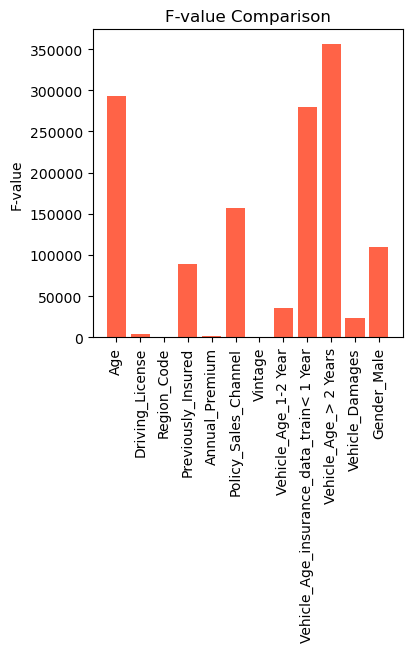

In [19]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

### It seems that the ONLY features that correlated to the target are [Age,Previously_Insured, Policy_Sales_Channel,Vehicle_Age_insurance_data_train< 1 Year , Vehicle_Age_> 2 Years,  Gender_Male]

### Split the dataset

In [17]:
insurance_data_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damages,Gender_Male
id,,,,,,,,,,,,,
0,21,1,35.0,0,65101.0,124.0,187,0,1,0,0,1,1
1,43,1,28.0,0,58911.0,26.0,288,1,0,0,1,1,1
2,25,1,14.0,1,38043.0,152.0,254,0,0,1,0,0,0
3,35,1,1.0,0,2630.0,156.0,76,0,1,0,0,1,0
4,36,1,15.0,1,31951.0,152.0,294,0,1,0,0,0,0


In [18]:
y_train = insurance_data_train['Response']

In [19]:
insurance_data_train.drop(['Response'], axis=1, inplace=True)

In [20]:
insurance_data_train.shape

(11504798, 12)

In [21]:
X_train = insurance_data_train.iloc[::]


#X_test = insurance_data_test[::]

### Using Smote To Handle Imbalanced Data

In [22]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
#print(y_train.value_counts())
#print()
#print(y_train_smote.value_counts())

### Scaling the dataset

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train_smote)
#data_scaled = scaler.fit_transform(insurance_data_train)

In [26]:
#test_dataset = scaler.fit_transform(insurance_data_test)

# Apply  neural network model

### Split the dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, 
                                                    test_size=0.2, random_state=42)

In [26]:
X_train

array([[-1.34959015,  0.04249797, -2.03670812, ..., -0.18699634,
        -1.53889657,  1.04631212],
       [-1.42359079,  0.04249797, -0.71255896, ..., -0.18699634,
        -1.53889657, -0.95573776],
       [-1.34959015,  0.04249797, -1.47551688, ..., -0.18699634,
         0.64981625, -0.95573776],
       ...,
       [-0.46158248,  0.04249797,  0.69434951, ..., -0.18699634,
         0.64981625,  1.04631212],
       [-0.90558631,  0.04249797,  0.11503426, ..., -0.18699634,
         0.64981625, -0.95573776],
       [ 0.87042903,  0.04249797,  0.11503426, ..., -0.18699634,
         0.64981625,  1.04631212]])

In [27]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(16143582, 12) (16143582,) (4035896, 12) (4035896,)


In [28]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras import regularizers
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
import warnings 
warnings.filterwarnings("ignore")
print("Setup Completed!")

Setup Completed!


In [29]:
model = tf.keras.models.Sequential()

# Neurons, dropouts
model.add(tf.keras.layers.Dense(units=256, input_dim=X_train.shape[1] ))
#model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=128, activation='leaky_relu'))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(units=64,  activation='leaky_relu'))
model.add(tf.keras.layers.Dropout(0.65))
model.add(tf.keras.layers.Dense(units=32, activation='leaky_relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(units=16, activation='leaky_relu'))
model.add(tf.keras.layers.Dropout(0.55))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # output unit must be 1


"""model = Sequential(
    [               
        tf.keras.Input(shape=(6,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units = 256, activation='leaky_relu'),#layer-1
        Dense(units = 128, activation='leaky_relu'),#layer-2
        Dense(units = 64, activation='leaky_relu'),#layer-3
        Dense(units = 32, activation='leaky_relu'), #layer-4
        Dense(units = 1, activation='sigmoid')#output layer
        
        ### END CODE HERE ### 
    ], name = "nn_model" 
)                            
"""

'model = Sequential(\n    [               \n        tf.keras.Input(shape=(6,)),    #specify input size\n        ### START CODE HERE ### \n        Dense(units = 256, activation=\'leaky_relu\'),#layer-1\n        Dense(units = 128, activation=\'leaky_relu\'),#layer-2\n        Dense(units = 64, activation=\'leaky_relu\'),#layer-3\n        Dense(units = 32, activation=\'leaky_relu\'), #layer-4\n        Dense(units = 1, activation=\'sigmoid\')#output layer\n        \n        ### END CODE HERE ### \n    ], name = "nn_model" \n)                            \n'

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [31]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0005),
    metrics=['accuracy'],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=3000,
    epochs=5,
    validation_data=(X_test, y_test),
    
)

Epoch 1/5
5382/5382 [==============================] - 229s 42ms/step - loss: 0.3908 - accuracy: 0.7980 - val_loss: 0.3731 - val_accuracy: 0.8108
Epoch 2/5
5382/5382 [==============================] - 219s 41ms/step - loss: 0.3813 - accuracy: 0.8042 - val_loss: 0.3727 - val_accuracy: 0.8111
Epoch 3/5
5382/5382 [==============================] - 202s 38ms/step - loss: 0.3804 - accuracy: 0.8054 - val_loss: 0.3716 - val_accuracy: 0.8116
Epoch 4/5
5382/5382 [==============================] - 186s 35ms/step - loss: 0.3800 - accuracy: 0.8059 - val_loss: 0.3717 - val_accuracy: 0.8118
Epoch 5/5
5382/5382 [==============================] - 184s 34ms/step - loss: 0.3799 - accuracy: 0.8060 - val_loss: 0.3716 - val_accuracy: 0.8120


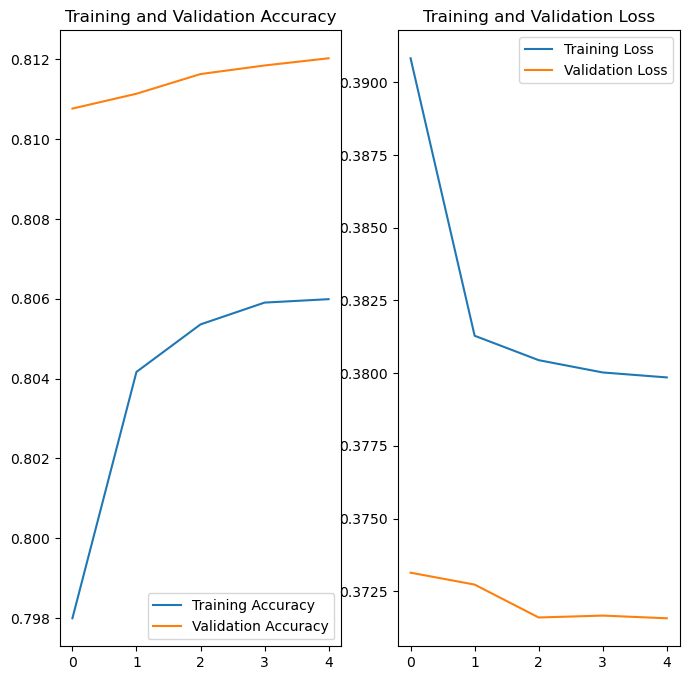

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
insurance_data_test.drop(['id'], axis=1, inplace=True)

In [36]:
X_test = insurance_data_test.iloc[::]

In [37]:
X_test_scaled = scaler.fit_transform(X_test)

In [38]:
X_test_scaled

array([[-1.22613164,  0.044532  ,  1.58325928, ..., -0.20843176,
        -1.00510569, -1.08622761],
       [ 0.57392768,  0.044532  ,  0.12108258, ..., -0.20843176,
         0.99492024,  0.92061736],
       [ 0.57392768,  0.044532  ,  1.27543261, ..., -0.20843176,
         0.99492024,  0.92061736],
       ...,
       [ 0.57392768,  0.044532  ,  0.50586592, ..., -0.20843176,
        -1.00510569,  0.92061736],
       [-0.55944301,  0.044532  ,  0.12108258, ..., -0.20843176,
         0.99492024,  0.92061736],
       [-1.02612505,  0.044532  ,  1.50630261, ..., -0.20843176,
        -1.00510569,  0.92061736]])

In [39]:
prediction = model.predict(X_test_scaled)

239684/239684 [==============================] - 344s 1ms/step


In [40]:
prediction

array([[7.2629344e-01],
       [9.9294388e-01],
       [9.9370462e-01],
       ...,
       [7.5223407e-04],
       [9.8696852e-01],
       [1.4776841e-04]], dtype=float32)

In [41]:
submit = pd.read_csv('./kaggle/sample_submission/sample_submission.csv')
submit.Response = prediction
submit[['id', 'Response']].to_csv('./kaggle/working/neural_network.csv', index=False)